In [1]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [2]:
data = pd.read_csv("bladder_cancer.csv")
data = data.dropna()
data.isnull().sum()
X = data.drop(columns=['Label'], axis=1)
y = data['Label']
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [3]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_scaled = scaler.transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [4]:
RFC = RandomForestClassifier(random_state=0)
n_estimators = list(range(10, 100, 2))
max_depth = list(range(1, 10, 1))
params = { 'n_estimators' : n_estimators,
           'max_depth' : max_depth,
           }
grid = GridSearchCV(RFC, param_grid= params, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(train_feature_scaled, train_label)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [5]:
best_parameter=grid.best_estimator_
print(grid_search.best_params_)
print("best_score:", grid.best_score_)

{'max_depth': 7, 'n_estimators': 50}
best_score: 0.9149359886201992


In [6]:
predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.875

In [7]:
results_df = pd.DataFrame(grid.cv_results_)
df_mean=results_df['mean_test_score']
df_mean

0      0.782219
1      0.782077
2      0.787482
3      0.787482
4      0.787482
         ...   
400    0.904552
401    0.904552
402    0.904552
403    0.909815
404    0.909815
Name: mean_test_score, Length: 405, dtype: float64

In [8]:
df_pivot_mean=results_df.pivot_table(values = 'mean_test_score', index='param_max_depth', columns ='param_n_estimators')
df_pivot_mean

param_n_estimators,10,12,14,16,18,20,22,24,26,28,...,80,82,84,86,88,90,92,94,96,98
param_max_depth,,,,,,,,,,,,,,,,,,,,,
1,0.782219,0.782077,0.787482,0.787482,0.787482,0.782219,0.776956,0.776814,0.776814,0.782077,...,0.808819,0.798009,0.803272,0.792745,0.792745,0.803414,0.798151,0.803414,0.803414,0.798151
2,0.851067,0.845804,0.845946,0.840683,0.835420,0.851351,0.846088,0.835420,0.845946,0.845946,...,0.861735,0.861735,0.861735,0.856472,0.861735,0.861735,0.861735,0.861735,0.861735,0.856472
3,0.845804,0.872404,0.861878,0.862020,0.856757,0.867425,0.867283,0.862020,0.862020,0.862020,...,0.867141,0.867141,0.867141,0.861878,0.861878,0.867283,0.867283,0.872546,0.872546,0.862020
4,0.883073,0.866999,0.872404,0.867141,0.872546,0.872546,0.883215,0.883073,0.888478,0.899004,...,0.883357,0.877952,0.877952,0.877952,0.877952,0.877952,0.883215,0.877952,0.883215,0.883215
5,0.872404,0.877667,0.883073,0.877809,0.872546,0.872546,0.877809,0.867283,0.856757,0.867283,...,0.883215,0.888620,0.883215,0.883215,0.883215,0.883215,0.888620,0.888620,0.888620,0.888620
6,0.834993,0.856330,0.861735,0.867141,0.877667,0.883073,0.883073,0.877809,0.883073,0.877809,...,0.888478,0.888478,0.888478,0.888478,0.893741,0.899147,0.899147,0.899147,0.899147,0.899147
7,0.851351,0.851209,0.867141,0.888478,0.883215,0.883215,0.877809,0.877809,0.877809,0.877809,...,0.899147,0.899147,0.904410,0.899147,0.899147,0.904410,0.909815,0.909815,0.909815,0.909815
8,0.861878,0.856472,0.872404,0.872546,0.867283,0.883215,0.877809,0.877809,0.888478,0.888478,...,0.899147,0.899147,0.899147,0.899147,0.904552,0.904552,0.904552,0.909815,0.909815,0.909815
9,0.856615,0.845804,0.861878,0.861878,0.862020,0.877952,0.883215,0.883215,0.877952,0.883215,...,0.899147,0.899147,0.899147,0.899147,0.904552,0.904552,0.904552,0.904552,0.909815,0.909815


In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

In [10]:
# set Times New Roman as global font

font_path = "C:/Windows/Fonts/times.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

(9, 45)
(9, 45)
(9, 45)


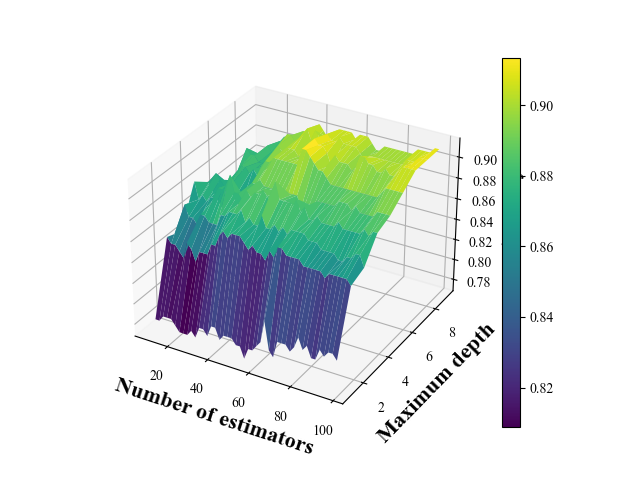

In [11]:
%matplotlib widget 
# forInteractive figures 

fig=plt.figure(5)
ax = plt.axes(projection='3d')
ax.set_xlabel('Number of estimators', fontsize=16,  fontdict=dict(weight='bold'))
ax.set_ylabel('Maximum depth', fontsize=16,  fontdict=dict(weight='bold'))
ax.set_zlabel('Accuracy', fontsize=16)

n_estimators, max_depth = np.meshgrid(n_estimators, max_depth)
print(n_estimators.shape)
print(max_depth.shape)
print(df_pivot_mean.shape)
graph = ax.plot_surface(n_estimators, max_depth,df_pivot_mean,cmap=cm.viridis)
fig.colorbar(graph,ax=ax)